# Descrição do projeto
Dataset hospedado no Kaggle: https://www.kaggle.com/imakash3011/customer-personality-analysis


## Objetivo
Apresentar um modelo de machine learnig capaz de agrupar com eficiência os diferentes clientes em função das características de consumo fornecidas.

## Glossário das features

### Informações do cliente
ID: identificador\
Year_Birth: data de nascimento\
Education: grau de escolaridade\
Marital_Status: estado civil\
Income: renda familiar anual\
Kidhome: número de crianças na casa\
Teenhome: número de adolescentes na casa\
Dt_Customer: data de inscrição na empresa\
Recency: dias desde a última compra\
Complain: reclamação nos últimos 2 anos (1 = sim, 0 = não)
###Produtos (em quantia gasta nos últimos 2 anos)
MntWines: vinho\
MntFruits: frutas\
MntMeatProducts: carne\
MntFishProducts: peixe\
MntSweetProducts: doces\
MntGoldProds: ouro
###Promoção
NumDealsPurchases: número de compras com desconto\
AcceptedCmp1: aceitou oferta na 1ª campanha (1 = sim, 0 = não)\
AcceptedCmp2: aceitou oferta na 2ª campanha (1 = sim, 0 = não)\
AcceptedCmp3: aceitou oferta na 3ª campanha (1 = sim, 0 = não)\
AcceptedCmp4: aceitou oferta na 4ª campanha (1 = sim, 0 = não)\
AcceptedCmp5: aceitou oferta na 5ª campanha (1 = sim, 0 = não)\
Response: aceitou oferta na última campanha (1 = sim, 0 = não)
###Local
NumWebPurchases: número de compras no web site\
NumCatalogPurchases: número de compras no catálogo\
NumStorePurchases: número de compras em lojas\
NumWebVisitsMonth: número de visitas ao site da empresa no último mês

# Carregando Dataset

## Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://www.dropbox.com/s/dzvpjaucv6yyv2v/marketing_campaign.csv?dl=1'
df = pd.read_csv(url, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Descrição dos dados

In [3]:
print('O dataset possui {} linhas e {} colunas.'.format(df.shape[0], df.shape[1]))

O dataset possui 2240 linhas e 29 colunas.


In [4]:
# colunas do dataset
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
# informações sobre as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
print("A coluna 'Income' é composta por valores com ponto flutuante.")
print("A coluna 'Dt_Costumer' apresenta datas e necessita de transformação.")
print("As colunas 'Education' e 'Marital_Status' são categóricas.")
print("Existem", df.isnull().sum().sum(), "valores nulos no dataset.")
print("Todos os valores nulos estão na coluna 'Income'.")

A coluna 'Income' é composta por valores com ponto flutuante.
A coluna 'Dt_Costumer' apresenta datas e necessita de transformação.
As colunas 'Education' e 'Marital_Status' são categóricas.
Existem 24 valores nulos no dataset.
Todos os valores nulos estão na coluna 'Income'.


In [7]:
# Eliminado elementos duplicados
df.drop_duplicates()
print(f'Foram eliminados %d elementos duplicados.' % len(df[df.duplicated()]))

Foram eliminados 0 elementos duplicados.


Análise preliminar

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Tratamento dos dados

Tratando valores nulos em 'Income'

In [9]:
print("A coluna 'Income' possui {} valores nulos".\
      format(df.Income.isnull().sum()))

A coluna 'Income' possui 24 valores nulos


In [10]:
# quais os elementos com valores nulos em 'Income'
df_nan = df[df['Income'].isnull()]
df_nan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [11]:
# proporção de valores nulos
print("{:.2f} % dos valores da coluna 'Income' são nulos.".\
      format((df.Income.isnull().sum() / df.shape[0]) * 100))

1.07 % dos valores da coluna 'Income' são nulos.


In [12]:
# removendo valores nulos do dataset
df = df.dropna()
df.isnull().sum().sum()

0

Transformando a coluna 'Dt_Customer' em uma variável numérica contínua

In [13]:
# alterando para datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], 
                                   dayfirst=True, 
                                   format = '%d-%m-%Y')

In [14]:
# convertendo a data de inscrição (datetime) para dias inscritos (int)
current_date = df['Dt_Customer'].max()
df['Dt_Customer'] = (current_date - df['Dt_Customer']).dt.days

In [15]:
df['Dt_Customer'].head()

0    663
1    113
2    312
3    139
4    161
Name: Dt_Customer, dtype: int64

In [16]:
# quantidade de valores distintos em cada coluna
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [17]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,353.521209,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,202.434667,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,180.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,355.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,529.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,699.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


As colunas 'Z_CostContract' e 'Z_Revenue' não possuem variância de dados.
A coluna ID não possui relevância para a análise aqui proposta;
Em ambos os casos, as colunas serão descartadas. 

In [18]:
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Redução de valores em 'Marital_Status'

In [19]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [20]:
# reduzindo os valores de 'Marital_Status' para uma variável binária
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 
                                                     'Together'],
                                                    'relationship')

df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 
                                                     'Widow', 
                                                     'Alone', 
                                                     'YOLO', 
                                                     'Absurd',
                                                     'Single'],
                                                    'single')

df['Marital_Status'].value_counts()

relationship    1430
single           786
Name: Marital_Status, dtype: int64

### Redução de dimensionalidade

Agrupando as colunas por temática

In [21]:
df['Children'] = df['Kidhome'] + df['Teenhome']

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

Transformação da coluna 'Year_Birth' em 'Age'

In [22]:
year = current_date.year

In [23]:
df['Age'] = year - df['Year_Birth']

In [24]:
col_del = ["AcceptedCmp1" , 
           "AcceptedCmp2", 
           "AcceptedCmp3" , 
           "AcceptedCmp4",
           "AcceptedCmp5", 
           "Response",
           "NumWebVisitsMonth", 
           "NumWebPurchases",
           "NumCatalogPurchases",
           "NumStorePurchases",
           "NumDealsPurchases" , 
           "Kidhome", 
           "Teenhome",
           "MntWines", 
           "MntFruits", 
           "MntMeatProducts", 
           "MntFishProducts", 
           "MntSweetProducts", 
           "MntGoldProds",
           "Year_Birth"]

df=df.drop(columns=col_del,axis=1)

## Classificando as colunas do dataset

Variveis numéricas contínuas

In [25]:
cont_variables = df[['Age', 
                     'Income',
                     'Dt_Customer', 
                     'Recency', 
                     'Expenses',
                     'NumTotalPurchases'
                     ]]

Variáveis discretas

In [26]:
disc_variables = df[['Children',
                     'TotalAcceptedCmp', 
                     'Complain',
                     'Marital_Status'
                     ]]                

Variáveis categóricas

In [27]:
categ_variables = df[['Education']]

# Análise exploratória

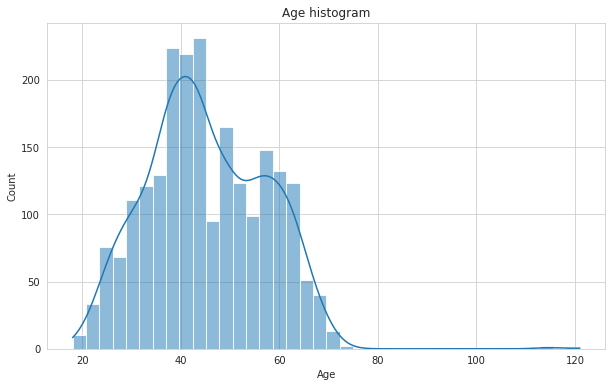

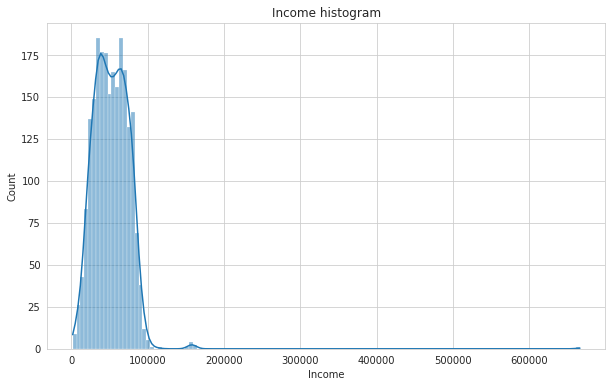

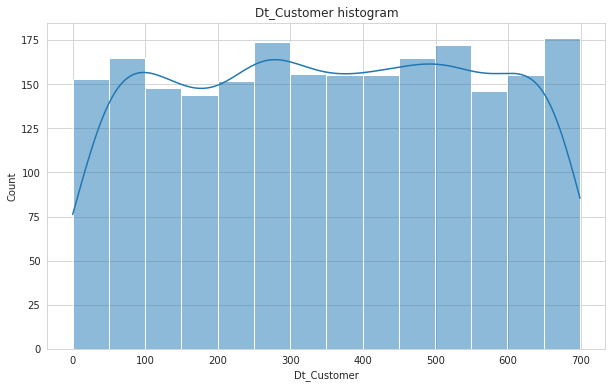

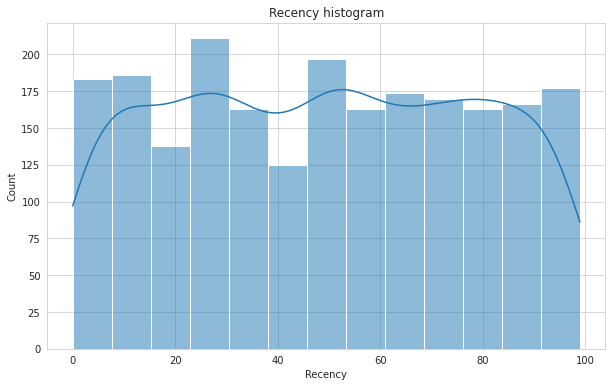

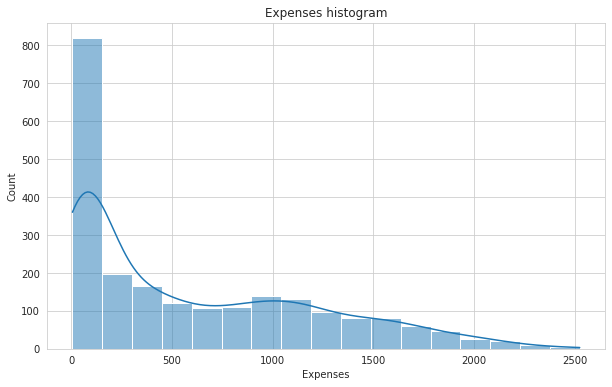

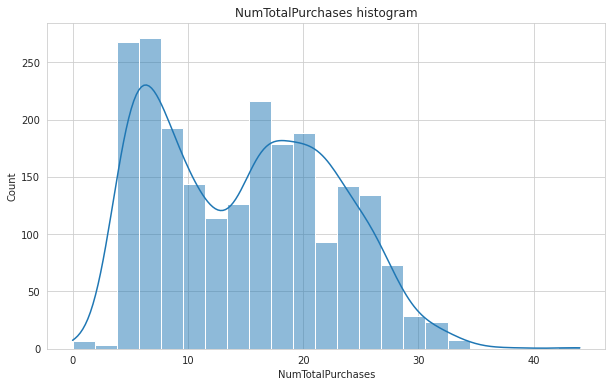

In [28]:
# pairplot das variáveis numéricas 

def histogram(variable):
  sns.set_style("whitegrid")
  ax = sns.histplot(data=df,
                    x=variable,
                    kde=True)
  ax.figure.set_size_inches(10,6)
  plt.title(label=variable+" histogram")
  plt.show()

for i in cont_variables:
  histogram(i)

In [29]:
def plot_categ(variable):
  ax = sns.catplot(x=variable, 
                   kind="count", 
                   data=df,
                   palette='icefire', 
                   legend=False)
  plt.title(label=variable+" histogram")
  ax.set_xticklabels(rotation=45)
  ax

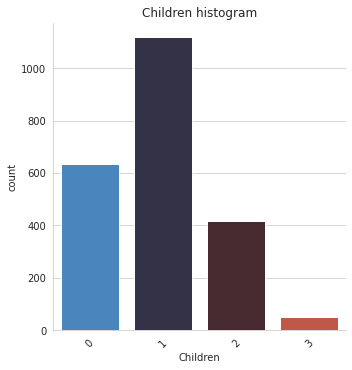

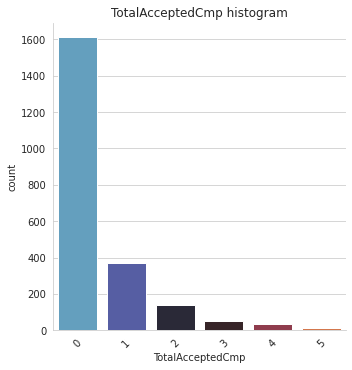

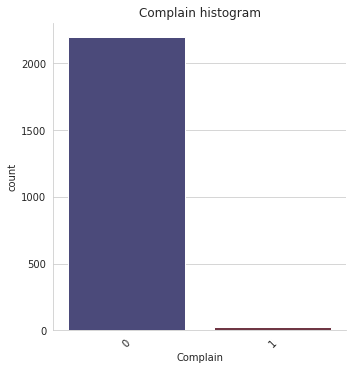

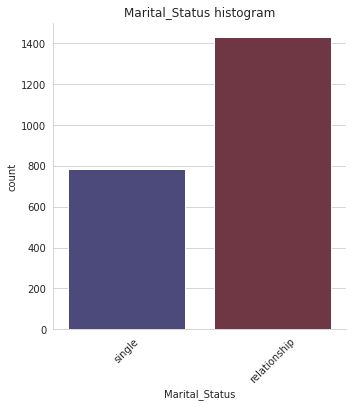

In [30]:
# histogramas das variáveis numéricas discretas
for i in disc_variables:
  plot_categ(i) 

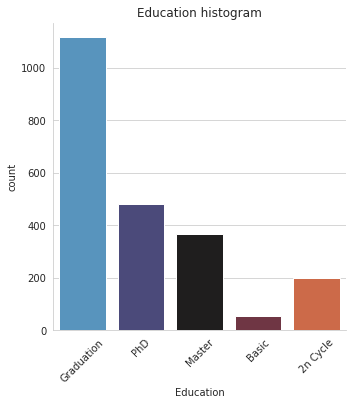

In [31]:
# histogramas das variáveis categóricas
for i in categ_variables:
  plot_categ(i)  

In [32]:
df.describe()

,Income,Dt_Customer,Recency,Complain,Children,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,353.521209,49.012635,0.009477,0.947202,607.075361,0.448556,14.880866,45.179603
std,25173.076661,202.434667,28.948352,0.096907,0.749062,602.900476,0.892440,7.670957,11.985554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,18.000000
25%,35303.000000,180.000000,24.000000,0.000000,0.000000,69.000000,0.000000,8.000000,37.000000
50%,51381.500000,355.500000,49.000000,0.000000,1.000000,396.500000,0.000000,15.000000,44.000000
75%,68522.000000,529.000000,74.000000,0.000000,1.000000,1048.000000,1.000000,21.000000,55.000000
max,666666.000000,699.000000,99.000000,1.000000,3.000000,2525.000000,5.000000,44.000000,121.000000


## Tratando outliers em variáveis contínuas

In [33]:
cont_variables

,Age,Income,Dt_Customer,Recency,Expenses,NumTotalPurchases
0,57,58138.0,663,58,1617,25
1,60,46344.0,113,38,27,6
2,49,71613.0,312,26,776,21
3,30,26646.0,139,26,53,8
4,33,58293.0,161,94,422,19
...,...,...,...,...,...,...
2235,47,61223.0,381,46,1341,18
2236,68,64014.0,19,56,444,22
2237,33,56981.0,155,91,1241,19
2238,58,69245.0,156,8,843,23


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


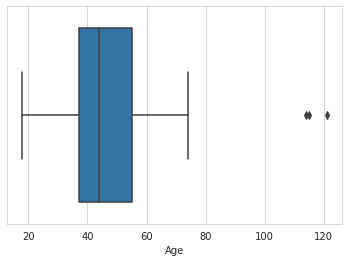

In [34]:
sns.boxplot(df['Age']);

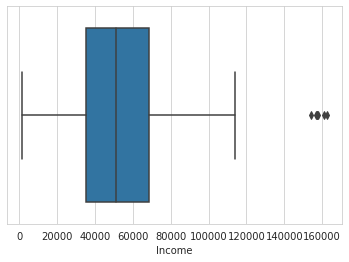

In [59]:
sns.boxplot(x=df['Income']);

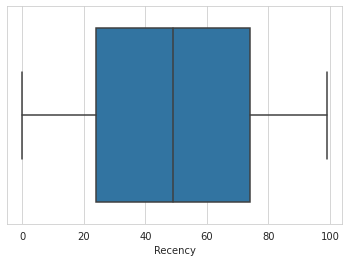

In [60]:
sns.boxplot(x=df['Recency']);

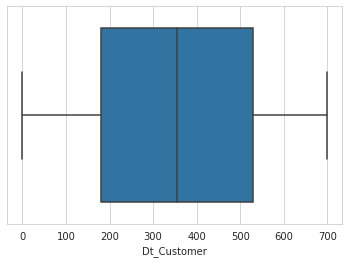

In [61]:
sns.boxplot(x=df['Dt_Customer']);

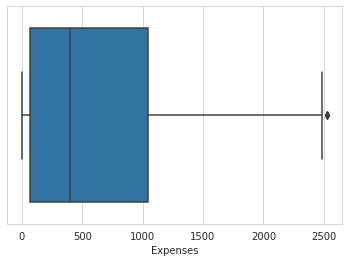

In [62]:
sns.boxplot(x=df['Expenses']);

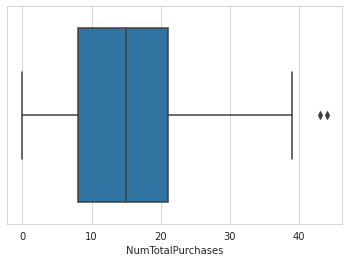

In [63]:
sns.boxplot(x=df['NumTotalPurchases']);

In [40]:
df_remove = df.loc[((df['Age'] > 100) | 
                    (df['Income'] > 600000))]

df = df.drop(df_remove.index)

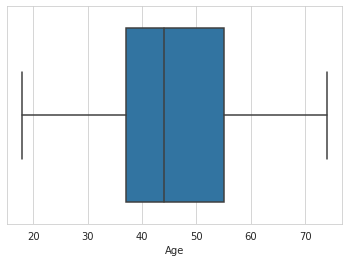

In [64]:
sns.boxplot(x=df['Age']);

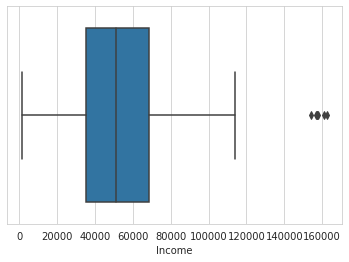

In [65]:
sns.boxplot(x=df['Income']);

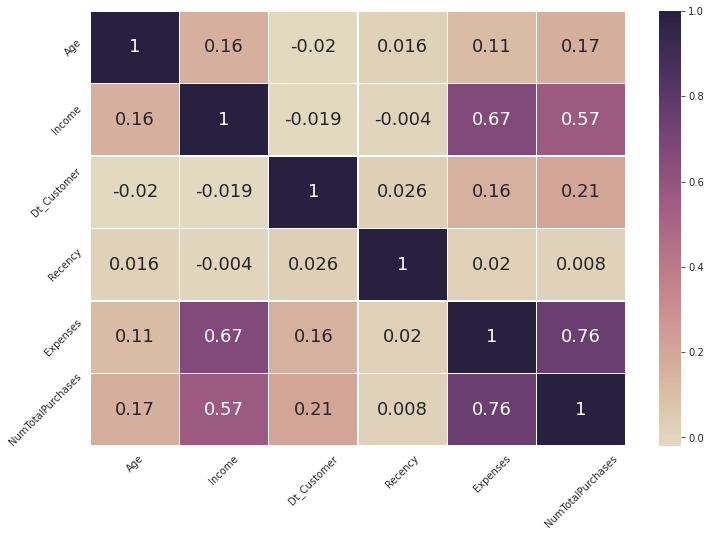

In [43]:
# observando correlações
corr = cont_variables.corr().round(3)
cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
plt.subplots(figsize=(12,8))
sns.heatmap(corr, 
            annot=True, 
            linewidths=0.2,
            cmap=cmap,
            annot_kws={"size": 18})
plt.yticks(rotation=45)
plt.xticks(rotation=45);


In [44]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Children,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
0,Graduation,single,58138.0,663,58,0,0,1617,1,25,57
1,Graduation,single,46344.0,113,38,0,2,27,0,6,60
2,Graduation,relationship,71613.0,312,26,0,0,776,0,21,49
3,Graduation,relationship,26646.0,139,26,0,1,53,0,8,30
4,PhD,relationship,58293.0,161,94,0,1,422,0,19,33


# Pré processamento

Transformação da coluna 'Education' para variável numérica discreta

In [45]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [46]:
swap = {
        'Graduation':1,
        'PhD':3, 
        'Master':2, 
        'Basic':0, 
        '2n Cycle':2
}

df['Education'] = df['Education'].map(swap)

Transformação da colunas 'Marital_Status' para variável binária



In [47]:
swap = {
        'single':0,
        'relationship':1
}

df['Marital_Status'] = df['Marital_Status'].map(swap)

In [48]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Children,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
0,1,0,58138.0,663,58,0,0,1617,1,25,57
1,1,0,46344.0,113,38,0,2,27,0,6,60
2,1,1,71613.0,312,26,0,0,776,0,21,49
3,1,1,26646.0,139,26,0,1,53,0,8,30
4,3,1,58293.0,161,94,0,1,422,0,19,33


In [49]:
df.describe()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Children,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1.664105,0.645570,51958.810579,353.714286,49.019439,0.009042,0.947559,607.268083,0.448915,14.891501,45.086347
std,0.840363,0.478449,21527.278844,202.494886,28.943121,0.094678,0.749466,602.513364,0.893017,7.671629,11.701599
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,18.000000
25%,1.000000,0.000000,35233.500000,180.000000,24.000000,0.000000,0.000000,69.000000,0.000000,8.000000,37.000000
50%,1.000000,1.000000,51371.000000,356.000000,49.000000,0.000000,1.000000,397.000000,0.000000,15.000000,44.000000
75%,2.000000,1.000000,68487.000000,529.000000,74.000000,0.000000,1.000000,1048.000000,1.000000,21.000000,55.000000
max,3.000000,1.000000,162397.000000,699.000000,99.000000,1.000000,3.000000,2525.000000,5.000000,44.000000,74.000000


Padronização das variáveis

In [50]:
# padronização das variáveis com um scaler menos senv
from sklearn.preprocessing import RobustScaler

values = RobustScaler().fit_transform(df.values)
print(values)

[[ 0.         -1.          0.20349738 ...  1.          0.76923077
   0.72222222]
 [ 0.         -1.         -0.15117206 ...  0.         -0.69230769
   0.88888889]
 [ 0.          0.          0.60871788 ...  0.          0.46153846
   0.27777778]
 ...
 [ 0.         -1.          0.16870405 ...  1.          0.30769231
  -0.61111111]
 [ 1.          0.          0.53750733 ...  0.          0.61538462
   0.77777778]
 [ 2.          0.          0.04504789 ...  1.         -0.30769231
   0.88888889]]


In [51]:
# treinando o modelo de clusterização
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, 
                n_init=10,
                max_iter=300)
y_pred = kmeans.fit_predict(values)

In [52]:
#calculando o coeficiente de silhouette
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, 
                                      labels, 
                                      metric='euclidean')
print(silhouette)

0.19373149667449627


In [53]:
# utilizando a métrica de avaliação da compactação dos clusters
dbs = metrics.davies_bouldin_score(values, 
                                   labels)
print(dbs)

1.7327911284213497


In [54]:
# utilizando a métrica de avaliação da dispersão de pontos dentro de um cluster
calinski = metrics.calinski_harabasz_score(values, 
                                           labels)
print(calinski)

514.72936137338


# Validação dos resultados

##Validação relativa

In [55]:
# função de validação relativa
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters,
                    n_init=10,
                    max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, 
                                 labels, 
                                 metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, 
                                               labels)
    return s, dbs, calinski 

In [56]:
s1, dbs1, calinski1 = clustering_algorithm(2, values)
print('Métricas s, dbs e calinski com 2 clusters \n', s1, dbs1, calinski1)
s2, dbs2, calinski2 = clustering_algorithm(3, values)
print('Métricas s, dbs e calinski com 3 clusters \n', s2, dbs2, calinski2)
s3, dbs3, calinski3 = clustering_algorithm(4, values)
print('Métricas s, dbs e calinski com 4 clusters \n', s3, dbs3, calinski3)
s4, dbs4, calinski4 = clustering_algorithm(5, values)
print('Métricas s, dbs e calinski com 5 clusters \n', s4, dbs4, calinski4)
s7, dbs7, calinski7 = clustering_algorithm(7, values)
print('Métricas s, dbs e calinski com 7 clusters \n', s7, dbs7, calinski7)
s10, dbs10, calinski10 = clustering_algorithm(10, values)
print('Métricas s, dbs e calinski com 10 clusters \n', s10, dbs10, calinski10)

Métricas s, dbs e calinski com 2 clusters 
 0.2084065253932816 1.8394366203649564 605.401785124319
Métricas s, dbs e calinski com 3 clusters 
 0.19342149108160747 1.7330488215180997 514.7139093033867
Métricas s, dbs e calinski com 4 clusters 
 0.1738451540724828 1.6819178345043424 472.13440373151343
Métricas s, dbs e calinski com 5 clusters 
 0.15547282942047302 1.8701531542952963 419.5047438534181
Métricas s, dbs e calinski com 7 clusters 
 0.14251569294617494 1.847869797399109 349.3290361763668
Métricas s, dbs e calinski com 10 clusters 
 0.13644834609747775 1.878815780406158 280.76866610938526


O número de clusters escolhido é : 3 

##Validação por comparação

In [57]:
from sklearn.cluster import DBSCAN, estimate_bandwidth

agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_DBSCAN = DBSCAN(eps = 2.7, min_samples= 81, metric = "manhattan")

BW = estimate_bandwidth(values, quantile = 0.18)

labels_kmeans = agrupador_kmeans.fit_predict(values)
labels_dbscan = agrupador_DBSCAN.fit_predict(values)

print("Labels K-Means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_dbscan)

Labels K-Means:  [2 0 2 ... 2 2 0]
Labels DBSCAN:  [-1  0  0 ... -1  0 -1]


In [67]:
from sklearn.metrics import silhouette_score

print("O coeficiente de silhueta do K-Means é: ", silhouette_score(df, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é: ", silhouette_score(df, labels_dbscan))


O coeficiente de silhueta do K-Means é:  0.28061305478095766
O coeficiente de silhueta do DBSCAN é:  0.20545592339174915


##Validação de estabilidade dos clusters

In [68]:
# separando o dataset e testando o agrupamento
import numpy as np
set1, set2 , set3 = np.array_split(values, 3)

s1, dbs1, calinski1 = clustering_algorithm(3, set1)
print('\nMétricas s, dbs e calinski com 3 clusters \n', s1, dbs1, calinski1)

s2, dbs2, calinski2 = clustering_algorithm(3, set2)
print('Métricas s, dbs e calinski com 3 clusters \n', s2, dbs2, calinski2)

s3, dbs3, calinski3 = clustering_algorithm(3, set3)
print('Métricas s, dbs e calinski com 3 clusters \n', s3, dbs3, calinski3)


Métricas s, dbs e calinski com 3 clusters 
 0.19483802825158367 1.7053897225122971 167.4984093959026
Métricas s, dbs e calinski com 3 clusters 
 0.1893223887604079 1.7385994059889052 175.66170309237873
Métricas s, dbs e calinski com 3 clusters 
 0.19519681701501734 1.742510369910274 172.92301005226514


A estabilidade dos clusters foi satisfatória.

In [69]:
# inserindo coluna com o cluster atribuído ao elemento
df['cluster'] = labels

# poderíamos analisar os clusters observando as estátisticas descritivas
df.groupby(df['cluster']).describe()

Education                                ...   Age                         
            count      mean       std  min  25%  ...   min    25%   50%   75%   max
cluster                                          ...                               
0          1176.0  1.571429  0.826168  0.0  1.0  ...  18.0  35.75  42.0  50.0  68.0
1           836.0  1.760766  0.840696  0.0  1.0  ...  19.0  40.00  49.0  58.0  74.0
2           200.0  1.805000  0.860627  1.0  1.0  ...  19.0  33.00  44.0  57.0  71.0

[3 rows x 88 columns]

# Visualização dos resultados

In [70]:
df.cluster.value_counts()

0    1176
1     836
2     200
Name: cluster, dtype: int64

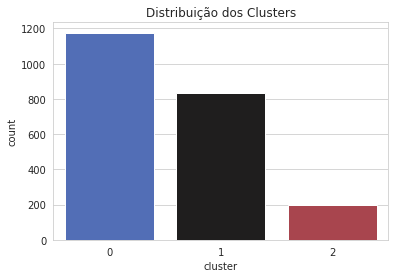

In [71]:
# plot da distribuição dos clusters 
ax = sns.countplot(x=df["cluster"], palette='icefire',)
ax.set_title("Distribuição dos Clusters")
plt.show()

Visualização dos clusters

In [72]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Income'],
                           y = df['Children'],
                           z = df['TotalAcceptedCmp'],
                           mode = 'markers',
                           marker = dict(color = labels.astype(np.float)),
                           text = labels))
fig.update_layout(scene = dict(
                    xaxis_title='Income',
                    yaxis_title='Children',
                    zaxis_title='Total Accepted Promo'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [73]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Income'],
                           y = df['Expenses'],
                           z = df['NumTotalPurchases'],
                           mode = 'markers',
                           marker = dict(color = labels.astype(np.float)),
                           text = labels))
fig.update_layout(scene = dict(xaxis_title='Income',
                               yaxis_title='Expenses',
                               zaxis_title='Total Purchases'), 
                  width=700, 
                  margin=dict(r=20, b=10, l=10, t=10))
fig.show()

# Comportamento dos clientes

In [74]:
# valor de centróides de cada atributo em cada cluster
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.5704584  -0.33786078 -0.44973902 -0.06721363 -0.00429542  0.01018676
   0.28438031 -0.26184076  0.18251273 -0.44096905 -0.06248821]
 [ 0.76258993 -0.36450839  0.50364126  0.05299142  0.03167866  0.00839329
  -0.382494    0.67693874  0.26978417  0.48745619  0.23634426]
 [ 0.805      -0.41        0.74428256  0.10247851 -0.1025      0.005
  -0.66        1.094857    2.765       0.47230769  0.05      ]]


In [75]:
# analisando a variância dos centróides para definir os principais atributos
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i],
          "\n{:.4f}".format(centroids[:,i].var()))

Education 
0.0104
Marital_Status 
0.0009
Income 
0.2658
Dt_Customer 
0.0051
Recency 
0.0032
Complain 
0.0000
Children 
0.1571
Expenses 
0.3218
TotalAcceptedCmp 
1.4337
NumTotalPurchases 
0.1885
Age 
0.0152


In [76]:
# selecionando as features com maior variância
description = df.groupby('cluster')[["Income",
                                     "Children",
                                     "Expenses",
                                     "TotalAcceptedCmp",
                                     "NumTotalPurchases"
                                     ]]
n_clients = description.size()
description = description.mean().round(3)
description['n_clients'] = n_clients


description

,Income,Children,Expenses,TotalAcceptedCmp,NumTotalPurchases,n_clients
cluster,,,,,,
0,36408.336,1.285,140.142,0.183,9.249,1176
1,68053.213,0.618,1058.250,0.269,21.334,836
2,76121.000,0.340,1468.865,2.765,21.140,200


## Resumo do perfil de clientes

* CLUSTER 0: Clientes de menor renda, mais filhos, que menos compram e aproveitam poucas promoções de descontos. Maior quantidade de clientes.
* CLUSTER 1: Clientes com mais compras. Boa quantidade de clientes.
* CLUSTER 2: Clientes de maior renda, gastos e compras com promoção e menos filhos. Menor quantidade de clientes.


# ESTRATÉGIAS DE NEGÓCIO SUGERIDAS A PARTIR DA CLUSTERIZAÇÃO

* Procurar um ajuste das promoções de desconto visando um maior volume de vendas aos clientes dos grupos 0 e 1.
    - *Por exemplo, um teste AB com um programa de pontos, com produtos distintos, parceria com outros comércio ou benefícios.*
* Intensificar os descontos para produtos mais baratos, direcionados aos clientes com filhos do grupo 0.
* Incentivar gastos de clientes do grupo 2. 
    - *Por exemplo, intensificando as promoções de desconto em produtos direcionados a adultos sem filhos.*
* Por meio de campanhas de marketing, procurar aumentar a base de clientes com o perfil do grupo 2. 